In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
t=titles
titles.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,Crucea de piatra,1993
3,Country,2000
4,Gaiking II,2011


In [4]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
c=cast
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,NaN
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [14]:
tmp = c[(c.character == 'Superman') | (c.character == 'Batman')].groupby(['year','character']).size().unstack().fillna(0)
tmp2 = tmp.Superman - tmp.Batman
len(tmp2[tmp2>0])

11

### How many years have been "Batman years", with more Batman characters than Superman characters?

In [15]:
tmp = c[(c.character == 'Superman') | (c.character == 'Batman')].groupby(['year','character']).size().unstack().fillna(0)
tmp2 = tmp.Batman - tmp.Superman
len(tmp2[tmp2>0])

26

### Plot the number of actor roles each year and the number of actress roles each year over the history of film.

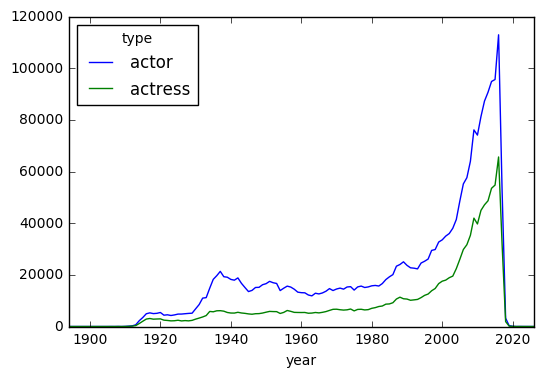

In [22]:
c.groupby(['year','type']).size().unstack('type').fillna(0).plot()

### Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.

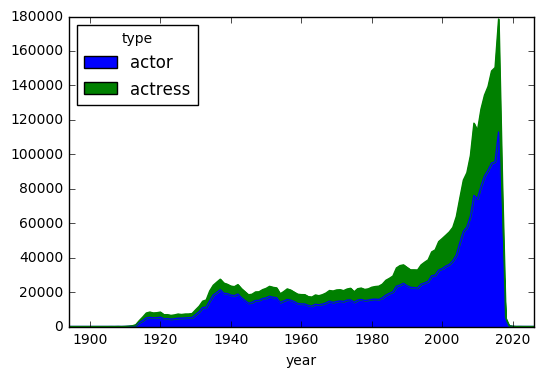

In [23]:
c.groupby(['year','type']).size().unstack('type').fillna(0).plot(kind='area')

### Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

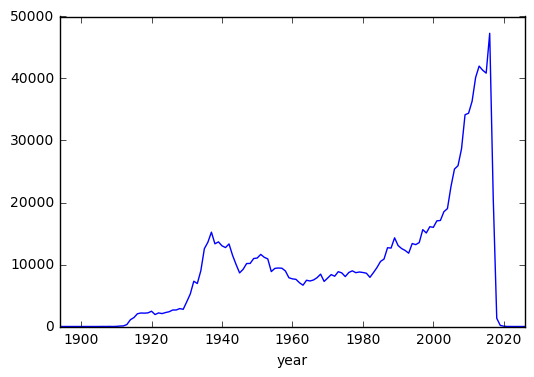

In [28]:
tmp = c.groupby(['year','type']).size().unstack('type').fillna(0)
(tmp.actor-tmp.actress).plot()

### Plot the fraction of roles that have been 'actor' roles each year in the hitsory of film.

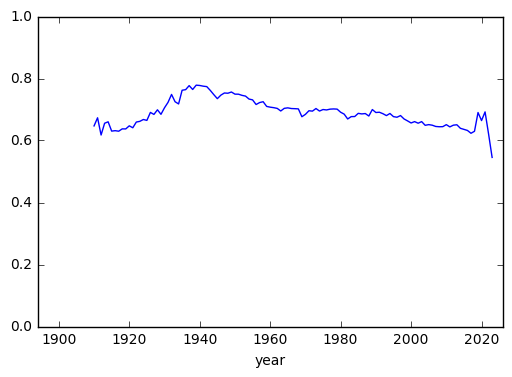

In [31]:
tmp = c.groupby(['year','type']).size().unstack('type')
(tmp.actor/(tmp.actor+tmp.actress)).plot(ylim=[0,1])

### Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

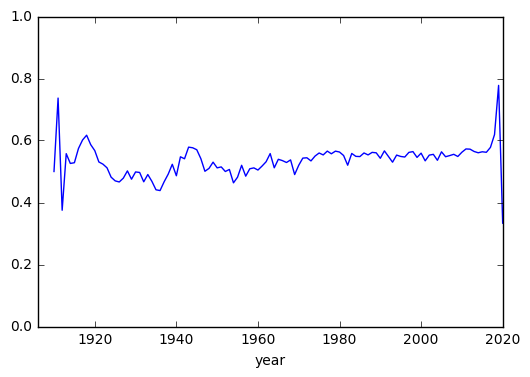

In [32]:
tmp = c[c.n==2].groupby(['year','type']).size().unstack('type')
(tmp.actor/(tmp.actor+tmp.actress)).plot(ylim=[0,1])

### Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.

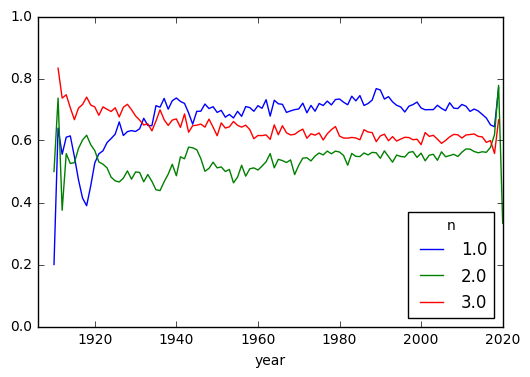

In [41]:
tmp = c[(c.n>0)&(c.n<4)].groupby(['year','type','n']).size().unstack('type')
(tmp.actor/(tmp.actor+tmp.actress)).unstack('n').plot(ylim=[0,1])
